<a href="https://colab.research.google.com/gist/VladYourich/5002730d3c313a89fd2853ae5c49b0c5/dataanaliticsforingate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Подготовка

**Загрузка библиотек:**

https://drive.google.com/file/d/1-_LKbDsiq0dDbks7_JnBJVV7v2iWjSkd/view?usp=sharing

In [ ]:
!pip install phik

In [ ]:
import matplotlib.pyplot as plt           # Импорт модуля pyplot
import numpy as np                        # Импорт библиотеки numpy
import pandas as pd                       # для анализа табличных массивов данных
import gdown, os, random                  # Стандартные библиотеки
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!gdown --id '1-_LKbDsiq0dDbks7_JnBJVV7v2iWjSkd'
!rm -r sample_data

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-_LKbDsiq0dDbks7_JnBJVV7v2iWjSkd
To: /content/base_for_analiz.zip
100% 88.5M/88.5M [00:01<00:00, 78.4MB/s]


In [ ]:
!unzip -o /content/base_for_analiz.zip

In [ ]:
base = '/content/base_for_analiz/Ozon/База.csv'
remove_list = ["(при наличии)",                 # список кусков текста для удаления из названий столбцов
               "(кроме Твери)",
               "руб.",
               "(перечеркнутая цена)",
               ",",
               "%",
               "с учетом скидки",
               "на рыночную цену"]

In [ ]:
# Нормализуем заголовки столбцов
def clean_header(header):

    cleaned_header = header
    cleaned_header = cleaned_header.replace('-', "_")
    cleaned_header = cleaned_header.replace('" ', '"')
    cleaned_header = cleaned_header.replace(' "', '"')

    for item in remove_list:
        cleaned_header = cleaned_header.replace(item, "")

    cleaned_header = cleaned_header.replace('  ', '')
    cleaned_header = cleaned_header.replace('_"', '"')
    cleaned_header = cleaned_header.strip()  # удаление ведущих и концевых пробелов
    cleaned_header = cleaned_header.replace(" ", "_")  # замена оставшихся пробелов символом "_"
    cleaned_header = cleaned_header.replace('_"', '"')

    list_heads = cleaned_header.replace(';', ',')
    list_heads = list_heads.replace('"', '')
    list_heads = list_heads.replace('_"', '"')
    # print(header, " --->  ", list_heads)

    return cleaned_header

def clean_csv(file_path):
    with open(file_path, 'r', newline='') as file:
        lines = file.readlines()
        cleaned_headers = clean_header(lines[0]);  # применяем функцию clean_header к каждому заголовку
        lines[0] = cleaned_headers + '\n'
        print(cleaned_headers)

    with open(file_path, 'w', newline='') as file:
        file.writelines(lines)

    return cleaned_headers

list_heads = clean_csv(base)


﻿"Артикул";"Ozon_Product_ID";"FBO_OZON_SKU_ID";"FBS_OZON_SKU_ID";"Barcode";"Наименование_товара";"Контент_рейтинг";"Бренд";"Статус_товара";"Видимость_FBO";"Причины_скрытия_FBO";"Видимость_FBS";"Причины_скрытия_FBS";"Дата_создания";"Коммерческая_категория";"Объем_товара_л";"Объемный_вес_кг";"Доступно_на_складе_Ozon_шт";"Вывезти_и_нанести_КИЗшт";"Зарезервировано_шт";"Доступно_на_моих_складах_шт";"Зарезервировано_на_моих_складах_шт";"Текущая_цена";"Цена_до_скидки";"Цена_Premium";"Рыночная_цена";"Актуальная_ссылка";"Размер_НДС"


In [ ]:
df = pd.read_csv('/content/base_for_analiz/Ozon/База.csv', sep=';')   #, encoding='cp1251' если выдаёт ошибку

In [ ]:
df.head(1)

,Артикул,Ozon_Product_ID,FBO_OZON_SKU_ID,FBS_OZON_SKU_ID,Barcode,Наименование_товара,Контент_рейтинг,Бренд,Статус_товара,Видимость_FBO,...,Вывезти_и_нанести_КИЗшт,Зарезервировано_шт,Доступно_на_моих_складах_шт,Зарезервировано_на_моих_складах_шт,Текущая_цена,Цена_до_скидки,Цена_Premium,Рыночная_цена,Актуальная_ссылка,Размер_НДС
0,'30273,105606938,298131117,298131122,2000000036618,Плата B003809.2 заднего фонаря BMW X3 F25 (дра...,'15,GNX,Продается,Показывается,...,0,0,26,0,1200.0,1800.0,NaN,NaN,NaN,0%


In [ ]:
len(df)

1263

In [ ]:
df.columns

Index(['Артикул', 'Ozon_Product_ID', 'FBO_OZON_SKU_ID', 'FBS_OZON_SKU_ID',
       'Barcode', 'Наименование_товара', 'Контент_рейтинг', 'Бренд',
       'Статус_товара', 'Видимость_FBO', 'Причины_скрытия_FBO',
       'Видимость_FBS', 'Причины_скрытия_FBS', 'Дата_создания',
       'Коммерческая_категория', 'Объем_товара_л', 'Объемный_вес_кг',
       'Доступно_на_складе_Ozon_шт', 'Вывезти_и_нанести_КИЗшт',
       'Зарезервировано_шт', 'Доступно_на_моих_складах_шт',
       'Зарезервировано_на_моих_складах_шт', 'Текущая_цена', 'Цена_до_скидки',
       'Цена_Premium', 'Рыночная_цена', 'Актуальная_ссылка', 'Размер_НДС'],
      dtype='object')

# Анализ данных

## Подготовка Датафреймов для дальнейшего анализа

### нормализуем таблицу **Base**

In [ ]:
df.isna().mean().sort_values(ascending=False)  # Смотрим в каких столбца какой процент пропусков и можно ли их восполнить или удалить столбец, если он не информативен для обучения модели

Цена_Premium                          1.000000
Актуальная_ссылка                     0.988915
Рыночная_цена                         0.988915
Причины_скрытия_FBS                   0.984165
Причины_скрытия_FBO                   0.978622
Цена_до_скидки                        0.125891
Barcode                               0.045922
Текущая_цена                          0.004751
Бренд                                 0.003959
Артикул                               0.000000
Объемный_вес_кг                       0.000000
Зарезервировано_на_моих_складах_шт    0.000000
Доступно_на_моих_складах_шт           0.000000
Зарезервировано_шт                    0.000000
Вывезти_и_нанести_КИЗшт               0.000000
Доступно_на_складе_Ozon_шт            0.000000
Коммерческая_категория                0.000000
Объем_товара_л                        0.000000
Ozon_Product_ID                       0.000000
Дата_создания                         0.000000
Видимость_FBS                         0.000000
Видимость_FBO

In [ ]:
# Физически удаляем из файла (плохой вариант)
# df.drop(df[df['Видимость_FBO'] == 'Скрыт'].index, inplace=True)
# df.drop(df[df['Видимость_FBS'] == 'Скрыт'].index, inplace=True)
# df1 = df.drop(df[df['Видимость_FBS'] == 'Скрыт'].index)
# df1 = df1.drop(df1[df1['Видимость_FBO'] == 'Скрыт'].index).copy()
df1 = df[df['Видимость_FBO'] != 'Скрыт'].copy()

In [ ]:
df = df1.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1221 entries, 0 to 1262
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Артикул                             1221 non-null   object 
 1   Ozon_Product_ID                     1221 non-null   int64  
 2   FBO_OZON_SKU_ID                     1221 non-null   int64  
 3   FBS_OZON_SKU_ID                     1221 non-null   int64  
 4   Barcode                             1178 non-null   object 
 5   Наименование_товара                 1221 non-null   object 
 6   Контент_рейтинг                     1221 non-null   object 
 7   Бренд                               1221 non-null   object 
 8   Статус_товара                       1221 non-null   object 
 9   Видимость_FBO                       1221 non-null   object 
 10  Причины_скрытия_FBO                 0 non-null      object 
 11  Видимость_FBS                       1221 no

In [ ]:
#df['Доступно_на_складах'] = df['Доступно_на_складе_Ozon_шт']+df['Доступно_на_моих_складах_шт']

In [ ]:
#df.sort_values('Доступно_на_складах', ascending=False)

In [ ]:
#df['Доступно_на_складах'].sum()

In [ ]:
df.isna().mean().sort_values(ascending=False)

**Удаляем колонки:**

Barcode - 0.045922 - неинформативен

Видимость_FBO -- неинформативен

Причины_скрытия_FBO - 0.978622 - неинформативен

Видимость_FBS -- неинформативен

Причины_скрытия_FBS -- неинформативен

Дата_создания -- неинформативен

Объем_товара_л -- неинформативен

Объемный_вес_кг -- неинформативен

Вывезти_и_нанести_КИЗшт -- неинформативен

Цена_Premium - 1.000000- пустой

Рыночная_цена -- 0.988915 - Пустой

Актуальная_ссылка -- 0.988915 -- неинформативен

Размер_НДС_% -- неинформативен

In [ ]:
df = df[['Ozon_Product_ID','Наименование_товара', 'Контент_рейтинг',
       'Коммерческая_категория','Текущая_цена', 'Цена_до_скидки']]
df.set_axis(['Ozon_ID','Товары', 'Контент_рейтинг','Коммерческая_категория','Текущая_цена', 'Цена_до_скидки'], axis=1, inplace=True)
df.head(1)


<ipython-input-39-5bee12cf36b8>:3: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(['Ozon_ID','Товары', 'Контент_рейтинг','Коммерческая_категория','Текущая_цена', 'Цена_до_скидки'], axis=1, inplace=True)


,Ozon_ID,Товары,Контент_рейтинг,Коммерческая_категория,Текущая_цена,Цена_до_скидки
0,105606938,Плата B003809.2 заднего фонаря BMW X3 F25 (дра...,'15,Фонарь задний для авто,1200.0,1800.0


In [ ]:
df.isna().mean().sort_values(ascending=False)

Цена_до_скидки            0.117117
Ozon_ID                   0.000000
Товары                    0.000000
Контент_рейтинг           0.000000
Коммерческая_категория    0.000000
Текущая_цена              0.000000
dtype: float64

In [ ]:
# Заполнение пустых значений в колонке 'Цена_до_скидки' значениями из колонки 'Текущая_цена'
df['Цена_до_скидки'].fillna(df['Текущая_цена'], inplace=True)
#df1 = df['Цена_до_скидки'].fillna(df['Текущая_цена']).copy()
#df['Цена_до_скидки'] = np.where(pd.notna(df['Цена_до_скидки']), df['Текущая_цена'], df['Цена_до_скидки'])

In [ ]:
df['Ozon_ID'] = df['Ozon_ID'].astype(str)

In [ ]:
# Преобразуем столбцы в тип данных 'float64'
# columns_to_convert = ['Контент_рейтинг', 'Столбец2', 'Столбец3']
# df[columns_to_convert] = df[columns_to_convert].astype(float)
df['Контент_рейтинг'] = df['Контент_рейтинг'].replace('Рассчитываем',"'0.0", regex=True)
df['Контент_рейтинг'] = df['Контент_рейтинг'].replace("'","", regex=True).astype(float)

In [ ]:
df.describe()


In [ ]:
df.info()

In [ ]:
cols = ['Ozon_ID']
for col in cols:
  nonuniq = df[df.duplicated(subset=col)][col]
  print(f'Не уникальных значений В колонке {col} - {nonuniq.count()}')

Не уникальных значений В колонке Ozon_ID - 0


In [ ]:
df['Товары'] = df['Товары'].replace("&quot;","", regex=True)
df['Товары'] = df['Товары'].replace("&apos;","", regex=True)

In [ ]:
# Выгружаем готовый ДФ  в отдельный файл
df.to_csv('base-done.csv', sep=';', index=False)
df_base = df.copy()

In [ ]:
!ls

### нормализуем таблицу **/content/base_for_analiz/Ozon/Аналитика Графики 01.06.2022-31.05.2023.xlsx**

In [ ]:
xls = '/content/base_for_analiz/Ozon/Аналитика Графики 01.06.2022-31.05.2023.xlsx'

In [ ]:
df = pd.read_excel(xls)   #, encoding='cp1251' если выдаёт ошибку

In [ ]:
import re

def clean_column_names(df):
    cleaned_columns = []

    for column in df.columns:
        cleaned_column = re.sub(r"[^\w\s]", "", column)  # Оставляем только буквы, цифры и пробелы
        cleaned_column = cleaned_column.replace(" ", "_")  # Заменяем пробелы на "_"
        cleaned_columns.append(cleaned_column)

    df.columns = cleaned_columns
    return df


In [ ]:
df = clean_column_names(df)
df.columns

Index(['Категория_3го_уровня', 'Товары', 'Модель', 'Ozon_ID', 'Артикул',
       'День', 'Уникальные_посетители_всего',
       'Уникальные_посетители_с_просмотром_карточки_товара', 'Показы_всего',
       'Показы_на_карточке_товара', 'Показы_в_поиске_и_каталоге',
       'Позиция_в_поиске_и_каталоге', 'В_корзину_всего', 'Заказано_товаров',
       'Отменено_товаров', 'Доставлено_за_выбранный_период',
       'Возвращено_товаров', 'Заказано_на_сумму',
       'Отправления_с_премиумподпиской_принятые_в_обработку'],
      dtype='object')

In [ ]:
# Убираем колонки
df = df[['Категория_3го_уровня', 'Ozon_ID', 'День','Показы_всего',
       'Показы_на_карточке_товара', 'Показы_в_поиске_и_каталоге',
       'Позиция_в_поиске_и_каталоге', 'Заказано_товаров']]

In [ ]:
df['День'] = pd.to_datetime(df['День'])

# Преобразуем столбец 'date' в нужный формат 'dd.mm.yyyy'
# df['День'] = df['День'].dt.strftime('%d.%m.%Y')

# df['День'] = pd.to_datetime(df['День'], format='%d.%m.%Y')
df['Позиция_в_поиске_и_каталоге'] = df['Позиция_в_поиске_и_каталоге'].replace(',','.', regex=True)
df['Позиция_в_поиске_и_каталоге'] = df['Позиция_в_поиске_и_каталоге'].astype(float)
df['Ozon_ID'] = df['Ozon_ID'].astype(str)

<ipython-input-57-b0b8ef48b187>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['День'] = pd.to_datetime(df['День'])


In [ ]:
df.dtypes


Категория_3го_уровня                   object
Ozon_ID                                object
День                           datetime64[ns]
Показы_всего                            int64
Показы_на_карточке_товара               int64
Показы_в_поиске_и_каталоге              int64
Позиция_в_поиске_и_каталоге           float64
Заказано_товаров                        int64
dtype: object

In [ ]:
df.head()

In [ ]:
df.isna().mean().sort_values(ascending=False)

Категория_3го_уровня           0.0
Ozon_ID                        0.0
День                           0.0
Показы_всего                   0.0
Показы_на_карточке_товара      0.0
Показы_в_поиске_и_каталоге     0.0
Позиция_в_поиске_и_каталоге    0.0
Заказано_товаров               0.0
dtype: float64

In [ ]:
# Выгружаем готовый ДФ  в отдельный файл
df.to_csv('grafik-done.csv', sep=';', index=False)
df_graf = df.copy()

### Подготовка Датафрейма "/content/base_for_analiz/Ozon/Аналитика Акции 01.06.2022-31.05.2023.xlsx"

In [ ]:
xls = '/content/base_for_analiz/Ozon/Аналитика Акции 01.06.2022-31.05.2023.xlsx'
df = pd.read_excel(xls)   #, encoding='cp1251' если выдаёт ошибку

In [ ]:
import re

def clean_column_names(df):
    cleaned_columns = []

    for column in df.columns:
        cleaned_column = re.sub(r"[^\w\s]", "", column)  # Оставляем только буквы, цифры и пробелы
        cleaned_column = cleaned_column.replace(" ", "_")  # Заменяем пробелы на "_"
        cleaned_columns.append(cleaned_column)

    df.columns = cleaned_columns
    return df


In [ ]:
df = clean_column_names(df)
df.columns

Index(['Категория_3го_уровня', 'Товары', 'Модель', 'Ozon_ID', 'Артикул',
       'Акции', 'День', 'Уникальные_посетители_всего',
       'Уникальные_посетители_с_просмотром_карточки_товара', 'Показы_всего',
       'Показы_на_карточке_товара', 'Показы_в_поиске_и_каталоге',
       'Позиция_в_поиске_и_каталоге', 'В_корзину_всего', 'Заказано_товаров',
       'Доставлено_за_выбранный_период', 'Заказано_на_сумму',
       'Заказано_товаров_по_акции', 'Заказано_на_сумму_по_акции',
       'Отправления_с_премиумподпиской_принятые_в_обработку'],
      dtype='object')

In [ ]:
df.isna().mean().sort_values(ascending=False)

Акции                                                    0.851619
Модель                                                   0.163113
Категория 3-го уровня                                    0.000000
Показы в поиске и каталоге                               0.000000
Заказано на сумму по акции                               0.000000
Заказано товаров по акции                                0.000000
Заказано на сумму                                        0.000000
Доставлено (за выбранный период)                         0.000000
Заказано товаров                                         0.000000
В корзину, всего                                         0.000000
Позиция в поиске и каталоге                              0.000000
Показы на карточке товара                                0.000000
Товары                                                   0.000000
Показы, всего                                            0.000000
Уникальные посетители с просмотром карточки товара       0.000000
Уникальные

In [ ]:
# Убираем колонгку 'Отправления_с_премиумподпиской_принятые_в_обработку'
df = df[['Категория_3го_уровня', 'Ozon_ID','Акции', 'День','Показы_всего',
       'Показы_на_карточке_товара', 'Показы_в_поиске_и_каталоге',
       'Позиция_в_поиске_и_каталоге', 'Заказано_товаров']]

In [ ]:
df['День'] = pd.to_datetime(df['День'])

<ipython-input-67-7fc45faf84dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['День'] = pd.to_datetime(df['День'])


In [ ]:
df['Ozon_ID'] = df['Ozon_ID'].astype(str)
#df['Артикул'] = df['Артикул'].astype(str) # удалили его
df['Позиция_в_поиске_и_каталоге'] = df['Позиция_в_поиске_и_каталоге'].replace(',','.', regex=True)
df['Позиция_в_поиске_и_каталоге'] = df['Позиция_в_поиске_и_каталоге'].astype(float)

In [ ]:
df.columns

Index(['Категория_3го_уровня', 'Ozon_ID', 'Акции', 'День', 'Показы_всего',
       'Показы_на_карточке_товара', 'Показы_в_поиске_и_каталоге',
       'Позиция_в_поиске_и_каталоге', 'Заказано_товаров'],
      dtype='object')

In [ ]:
df.dtypes

Категория_3го_уровня                   object
Ozon_ID                                object
Акции                                  object
День                           datetime64[ns]
Показы_всего                            int64
Показы_на_карточке_товара               int64
Показы_в_поиске_и_каталоге              int64
Позиция_в_поиске_и_каталоге           float64
Заказано_товаров                        int64
dtype: object

In [ ]:
df['Акции'] = np.where(pd.notna(df['Акции']), 1, 0)

In [ ]:
df.isna().mean().sort_values(ascending=False)

Категория_3го_уровня           0.0
Ozon_ID                        0.0
Акции                          0.0
День                           0.0
Показы_всего                   0.0
Показы_на_карточке_товара      0.0
Показы_в_поиске_и_каталоге     0.0
Позиция_в_поиске_и_каталоге    0.0
Заказано_товаров               0.0
dtype: float64

In [ ]:
# Выгружаем готовый ДФ  в отдельный файл
df.to_csv('action-done.csv', sep=';', index=False)
df_act = df.copy()

## Соединяем таблицы

### Подготовка, загрузка готовых датафреймов

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!gdown --id '10_sxSEQmVfegRMp4WB9coY7b_SDCHmzT' # ozon.zip
#!gdown --id '1Q76V4eNcATnnQ9CrZ-PR2EDbzVJ6Wdnl' # action-done.csv
#!gdown --id '1-3CUQ5ecLG5ycFcugO1MpZtpRNw3Jr4n' # grafik-done.csv
#!gdown --id '1-2qKjA7Z_DMGg6eqT5GBW2oRwN7Ax_zD' # base-done.csv

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=10_sxSEQmVfegRMp4WB9coY7b_SDCHmzT
To: /content/ozon.zip
100% 4.20M/4.20M [00:00<00:00, 184MB/s]


In [ ]:
!unzip -o /content/ozon.zip

Archive:  /content/ozon.zip
  inflating: action-done.csv         
  inflating: base-done.csv           
  inflating: grafik-done.csv         
  inflating: dict_category.json      


In [ ]:
!rm -r sample_data

rm: cannot remove 'sample_data': No such file or directory


In [ ]:
#df_baseb = pd.read_csv('/content/base-done.csv', sep=';') # Base бесполезен для анализа. убираем его
df_graf = pd.read_csv('/content/grafik-done.csv', sep=';')
df_act = pd.read_csv('/content/action-done.csv', sep=';')

#### Объединяем и анализируем

In [ ]:
df_graf.dtypes

Категория_3го_уровня            object
Ozon_ID                          int64
День                            object
Показы_всего                     int64
Показы_на_карточке_товара        int64
Показы_в_поиске_и_каталоге       int64
Позиция_в_поиске_и_каталоге    float64
Заказано_товаров                 int64
dtype: object

In [ ]:
df_act.dtypes

Категория_3го_уровня            object
Ozon_ID                          int64
Акции                            int64
День                            object
Показы_всего                     int64
Показы_на_карточке_товара        int64
Показы_в_поиске_и_каталоге       int64
Позиция_в_поиске_и_каталоге    float64
Заказано_товаров                 int64
dtype: object

In [ ]:
# unique_df_act = set(df_act['Ozon_ID'].unique())
# unique_df_graf = set(df_graf['Ozon_ID'].unique())
#unique_df_base = set(df_base['Ozon_ID'].unique())  # Base бесполезен для анализа
# common_act2graf = unique_df_act.intersection(unique_df_graf)
#common_base2graf = unique_df_base.intersection(unique_df_graf)
# print(common_act2graf)
# print(len(common_act2graf))
# print('------------------')
# print('Общие коды в Base и Graf',len(common_base2graf))
# print(common_base2graf)
# print('------------------')
# print(unique_df_base)
# print(len(unique_df_base))

Общих Уникальных позиций в объединенном датафрейме будет - 852
в БАЗЕ - 1221

In [ ]:
u_g = df_graf[['Ozon_ID','День']]
print('Уникальных позиций в Графиках: ', len(u_g['Ozon_ID'].unique()))
u_a = df_act[['Ozon_ID','День']]
print('Уникальных позиций в Графиках: ', len(u_a['Ozon_ID'].unique()))


Уникальных позиций в Графиках:  1233
Уникальных позиций в Графиках:  878


In [ ]:
# Проверяем Общие значения в Графиках и Акциях
mga = pd.merge(u_g,u_a, on=['Ozon_ID','День'], how='inner')
print('Всего строк по совпадающим ID: ', len(mga))
print(mga.columns)

Всего строк по совпадающим ID:  241301
Index(['Ozon_ID', 'День'], dtype='object')


In [ ]:
# Общие значения в Графиках и Акциях
merge_ga = pd.merge(df_graf,df_act, on=['Ozon_ID','День'], how='inner')
print(merge_ga.columns)

Index(['Категория_3го_уровня_x', 'Ozon_ID', 'День', 'Показы_всего_x',
       'Показы_на_карточке_товара_x', 'Показы_в_поиске_и_каталоге_x',
       'Позиция_в_поиске_и_каталоге_x', 'Заказано_товаров_x',
       'Категория_3го_уровня_y', 'Акции', 'Показы_всего_y',
       'Показы_на_карточке_товара_y', 'Показы_в_поиске_и_каталоге_y',
       'Позиция_в_поиске_и_каталоге_y', 'Заказано_товаров_y'],
      dtype='object')


In [ ]:
# Транформируем категории в соответствующие числовые значения
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
merge_ga['Категория_3го_уровня'] = label_encoder.fit_transform(merge_ga['Категория_3го_уровня_x'])
unique_categories_encoded = merge_ga['Категория_3го_уровня'].unique()
# Преобразование каждого элемента списка в int
unique_categories_encoded = [int(x) for x in unique_categories_encoded]
unique_categories = merge_ga['Категория_3го_уровня_x'].unique()
print(unique_categories_encoded, unique_categories)
print('------------------')
dict_category = dict(zip(unique_categories_encoded, unique_categories))
dict_category

[5, 7, 1, 4, 3, 0, 2, 8, 6] ['Разное автопринадлежности' 'Фара автомобильная' 'Другое'
 'Лампа автомобильная' 'Комплектующие светодиодной лампы для авто'
 'Автохимия - Герметик, клей' 'Комплектующие для ксеноновых фар'
 'Фонарь задний для авто' 'Светодиодный модуль']
------------------


{5: 'Разное автопринадлежности',
 7: 'Фара автомобильная',
 1: 'Другое',
 4: 'Лампа автомобильная',
 3: 'Комплектующие светодиодной лампы для авто',
 0: 'Автохимия - Герметик, клей',
 2: 'Комплектующие для ксеноновых фар',
 8: 'Фонарь задний для авто',
 6: 'Светодиодный модуль'}

In [ ]:
import json

# Сохранение словаря в файл JSON на будущее, когда придётся преобразовать коды в названия категорий
def save_dict_to_json(dictionary, filename):
    with open(filename, 'w') as file:
        json.dump(dictionary, file)

# Загрузка словаря из файла JSON
def load_dict_from_json(filename):
    with open(filename, 'r') as file:
        dictionary = json.load(file)
    return dictionary


# Сохранение словаря в файл JSON
save_dict_to_json(dict_category, 'dict_category.json')
save_dict_to_json(dict_category, '/content/drive/MyDrive/AI-EDU/dict_category.json')
# Загрузка словаря из файла JSON
loaded_dict = load_dict_from_json('dict_category.json')

loaded_dict

{'5': 'Разное автопринадлежности',
 '7': 'Фара автомобильная',
 '1': 'Другое',
 '4': 'Лампа автомобильная',
 '3': 'Комплектующие светодиодной лампы для авто',
 '0': 'Автохимия - Герметик, клей',
 '2': 'Комплектующие для ксеноновых фар',
 '8': 'Фонарь задний для авто',
 '6': 'Светодиодный модуль'}

In [ ]:
df = merge_ga.copy()

In [ ]:
# Колонка ДЕНЬ снова стала тип Object после загрузки. Меняем на Datetime
df['День'] = pd.to_datetime(df['День'])

In [ ]:
df.dtypes

Категория_3го_уровня_x                   object
Ozon_ID                                   int64
День                             datetime64[ns]
Показы_всего_x                            int64
Показы_на_карточке_товара_x               int64
Показы_в_поиске_и_каталоге_x              int64
Позиция_в_поиске_и_каталоге_x           float64
Заказано_товаров_x                        int64
Категория_3го_уровня_y                   object
Акции                                     int64
Показы_всего_y                            int64
Показы_на_карточке_товара_y               int64
Показы_в_поиске_и_каталоге_y              int64
Позиция_в_поиске_и_каталоге_y           float64
Заказано_товаров_y                        int64
Категория_3го_уровня                      int64
dtype: object

In [ ]:
df.columns

Index(['Категория_3го_уровня_x', 'Ozon_ID', 'День', 'Показы_всего_x',
       'Показы_на_карточке_товара_x', 'Показы_в_поиске_и_каталоге_x',
       'Позиция_в_поиске_и_каталоге_x', 'Заказано_товаров_x',
       'Категория_3го_уровня_y', 'Акции', 'Показы_всего_y',
       'Показы_на_карточке_товара_y', 'Показы_в_поиске_и_каталоге_y',
       'Позиция_в_поиске_и_каталоге_y', 'Заказано_товаров_y',
       'Категория_3го_уровня'],
      dtype='object')

In [ ]:
# уьираем лишние колонки
df = df[['Категория_3го_уровня_x', 'Ozon_ID', 'День', 'Показы_всего_x',
      'Показы_на_карточке_товара_x', 'Показы_в_поиске_и_каталоге_x',
      'Позиция_в_поиске_и_каталоге_x', 'Заказано_товаров_x',
      'Категория_3го_уровня_y', 'Акции', 'Показы_всего_y',
      'Показы_на_карточке_товара_y', 'Показы_в_поиске_и_каталоге_y',
      'Позиция_в_поиске_и_каталоге_y', 'Заказано_товаров_y']]

Теперь нужно прийти к основному составу колонок значимых для построения нейронки.
видятся 2 гипотезы объединения значений:
1. СЛОЖИТЬ значения числовых колонок, предполагая, что они независимы
2. Выбрать МАКСИМАЛЬНОЕ значение, предполагая, что меньшее входит в большее

Реализуем оба варианта и сохраним для экспериментов в одном датафрейме

In [ ]:
df_backup = df.copy() # делаем бакап

In [ ]:
df = df_backup.copy()

In [ ]:
# реализуем 1 гипотизу
df['Показы_всего_1'] = df['Показы_всего_x'] + df['Показы_всего_y']
df['Показы_всего_2'] = df[['Показы_всего_x','Показы_всего_y']].max(axis=1)

df['Показы_на_карточке_товара_1'] = df['Показы_на_карточке_товара_x'] + df['Показы_на_карточке_товара_y']
df['Показы_на_карточке_товара_2'] = df[['Показы_на_карточке_товара_x','Показы_на_карточке_товара_y']].max(axis=1)

df['Показы_в_поиске_и_каталоге_1'] = df['Показы_в_поиске_и_каталоге_x'] + df['Показы_в_поиске_и_каталоге_y']
df['Показы_в_поиске_и_каталоге_2'] = df[['Показы_в_поиске_и_каталоге_x','Показы_в_поиске_и_каталоге_y']].max(axis=1)

# Позицию в поиске складывать нельзя, поэтому показываем минимальную (хотя, это и не совсем правильно)
df['Позиция_в_поиске_и_каталоге'] = df[['Позиция_в_поиске_и_каталоге_x','Позиция_в_поиске_и_каталоге_y']].min(axis=1)

df['Заказано_товаров_1'] = df['Заказано_товаров_x'] + df['Заказано_товаров_y']
df['Заказано_товаров_2'] = df[['Заказано_товаров_x','Заказано_товаров_y']].max(axis=1)

In [ ]:
df.dtypes

Категория_3го_уровня_x                   object
Ozon_ID                                   int64
День                             datetime64[ns]
Показы_всего_x                            int64
Показы_на_карточке_товара_x               int64
Показы_в_поиске_и_каталоге_x              int64
Позиция_в_поиске_и_каталоге_x           float64
Заказано_товаров_x                        int64
Категория_3го_уровня_y                   object
Акции                                     int64
Показы_всего_y                            int64
Показы_на_карточке_товара_y               int64
Показы_в_поиске_и_каталоге_y              int64
Позиция_в_поиске_и_каталоге_y           float64
Заказано_товаров_y                        int64
Показы_всего_1                            int64
Показы_всего_2                            int64
Показы_на_карточке_товара_1               int64
Показы_на_карточке_товара_2               int64
Показы_в_поиске_и_каталоге_1              int64
Показы_в_поиске_и_каталоге_2            

In [ ]:
def kill_columns():
  # Цикл для удаления столбцов
  for column in df.columns:
      if '_x' in column or '_y' in column:
          df.drop(column, axis=1, inplace=True)

kill_columns()

In [ ]:
df.columns

Index(['Ozon_ID', 'День', 'Акции', 'Показы_всего_1', 'Показы_всего_2',
       'Показы_на_карточке_товара_1', 'Показы_на_карточке_товара_2',
       'Показы_в_поиске_и_каталоге_1', 'Показы_в_поиске_и_каталоге_2',
       'Позиция_в_поиске_и_каталоге', 'Заказано_товаров_1',
       'Заказано_товаров_2'],
      dtype='object')

In [ ]:
df.head(3)


,Ozon_ID,День,Акции,Показы_всего_1,Показы_всего_2,Показы_на_карточке_товара_1,Показы_на_карточке_товара_2,Показы_в_поиске_и_каталоге_1,Показы_в_поиске_и_каталоге_2,Позиция_в_поиске_и_каталоге,Заказано_товаров_1,Заказано_товаров_2
0,882353427,2023-03-05,0,138,69,6,3,80,40,110.33,0,0
1,882353427,2023-03-06,0,218,109,6,3,92,46,103.43,0,0
2,882353427,2023-03-07,0,100,50,4,2,74,37,97.14,0,0


In [ ]:
#df['Акции'] = np.where(pd.notna(df['Акции']), 1, 0)

In [ ]:
#df.to_csv('/content/drive/MyDrive/AI-EDU/act_graf-done.csv', sep=';', index=False)
df.to_csv('/content/act_graf-done.csv', sep=';', index=False)

In [ ]:
df.to_csv('/content/drive/MyDrive/AI-EDU/act_graf-done.csv', sep=';', index=False)

### разделим датафрейм на 2 для визуализации

In [ ]:
#df.fillna(0, inplace=True)  # Заполнение пропущенных значений нулями
#df = df.query('Заказано_товаров_1 != 0 and Заказано_товаров_2 != 0')  # Удаление строк с нулевыми значениями
#print(len(df))
# Проверяем сколько у нас позиций с заказами и средний заказ весь период
df.groupby('Ozon_ID',dropna=False)[['Заказано_товаров_1', 'Заказано_товаров_2']].agg(['count','mean']).sort_values(by=('Заказано_товаров_1', 'mean'),ascending=False)

Заказано_товаров_1           Заказано_товаров_2          
                       count      mean              count      mean
Ozon_ID                                                            
800183940                189  2.603175                189  1.301587
556497014                368  2.516304                368  1.263587
510826421                368  2.266304                368  1.133152
664763425                288  1.402778                288  0.701389
664763420                302  1.105960                302  0.552980
...                      ...       ...                ...       ...
500442674                311  0.000000                311  0.000000
522646688                344  0.000000                344  0.000000
597896699                335  0.000000                335  0.000000
500443288                328  0.000000                328  0.000000
510663285                328  0.000000                328  0.000000

[878 rows x 4 columns]

In [ ]:
# Гипотеза 1: Проверяем сколько у нас позиций с заказами и средний заказ за весь период
df.groupby(['Ozon_ID','Акции'])[['Заказано_товаров_1']].agg(['count','mean']).sort_values(by=('Заказано_товаров_1', 'mean'),ascending=False).head(15)


Заказано_товаров_1          
                             count      mean
Ozon_ID   Акции                             
800183940 1                     39  5.948718
556497014 1                     87  3.862069
664763420 1                     55  2.581818
510826421 1                     58  2.517241
800183936 1                     48  2.375000
510826421 0                    310  2.219355
556497014 0                    281  2.099644
260919692 1                     62  2.096774
664773227 1                     43  2.046512
511572185 1                      2  2.000000
511572010 1                     45  2.000000
664763759 1                     22  2.000000
511572364 1                     73  1.835616
800183940 0                    150  1.733333
763831480 1                     82  1.609756

Вывод:

In [ ]:
len(df)

241301

In [ ]:
# Гипотеза 2: Проверяем сколько у нас позиций с заказами и средний заказ за весь период
df.groupby(['Ozon_ID','Акции'])[['Заказано_товаров_2']].agg(['count','mean']).sort_values(by=('Заказано_товаров_2', 'mean'),ascending=False)


Заказано_товаров_2          
                             count      mean
Ozon_ID   Акции                             
800183940 1                     39  2.974359
556497014 1                     87  1.931034
664763420 1                     55  1.290909
510826421 1                     58  1.258621
800183936 1                     48  1.187500
...                            ...       ...
522647043 0                    236  0.000000
522647045 0                    302  0.000000
          1                     50  0.000000
500439886 1                     39  0.000000
512115649 0                    295  0.000000

[1756 rows x 2 columns]

In [ ]:
df.to_csv('/content/drive/MyDrive/AI-EDU/act_graf-done.csv', sep=';', index=False)

In [ ]:
df1 = df.copy()
df2 = df.copy()

In [ ]:
def kill_columns2(df_,gip):
  # Цикл для удаления столбцов
  for column in df.columns:
      if gip in column:
          df_.drop(column, axis=1, inplace=True)
  return df_.copy()


In [ ]:
df1.columns

Index(['Ozon_ID', 'День', 'Акции', 'Показы_всего_1', 'Показы_всего_2',
       'Показы_на_карточке_товара_1', 'Показы_на_карточке_товара_2',
       'Показы_в_поиске_и_каталоге_1', 'Показы_в_поиске_и_каталоге_2',
       'Позиция_в_поиске_и_каталоге', 'Заказано_товаров_1',
       'Заказано_товаров_2'],
      dtype='object')

In [ ]:
df1 = kill_columns2(df1,'_2')

In [ ]:
df1.columns

Index(['Ozon_ID', 'День', 'Акции', 'Показы_всего_1',
       'Показы_на_карточке_товара_1', 'Показы_в_поиске_и_каталоге_1',
       'Позиция_в_поиске_и_каталоге', 'Заказано_товаров_1'],
      dtype='object')

In [ ]:
df2 = kill_columns2(df2,'_1')

In [ ]:
df2.columns

Index(['Ozon_ID', 'День', 'Акции', 'Показы_всего_2',
       'Показы_на_карточке_товара_2', 'Показы_в_поиске_и_каталоге_2',
       'Позиция_в_поиске_и_каталоге', 'Заказано_товаров_2'],
      dtype='object')

## Корреляции

In [ ]:
phik_overview = df1.phik_matrix()

<Axes: >

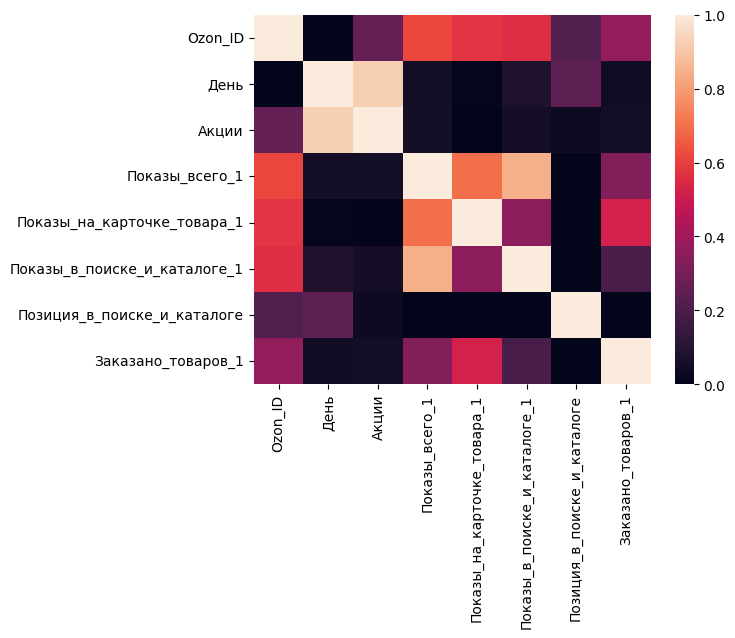

In [ ]:
sns.heatmap(phik_overview)

In [ ]:
columns = ['Показы_всего_1', 'Показы_на_карточке_товара_1', 'Показы_в_поиске_и_каталоге_1', 'Позиция_в_поиске_и_каталоге', 'Заказано_товаров_1']
phik_overview = df2.phik_matrix(df2[columns], method='phi', normalize=True) # так и не понял, почему ошибка

In [ ]:
sns.heatmap(phik_overview)